Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

In [1]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [2]:

dataset = pd.read_csv(r"C:\Users\Dell\Downloads\avocado.csv")
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
dataset.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


there are 3 data are object type i.e "region","type","date"..9 column are float type i.e AveragePrice, Total Volume ,4046 ,42256,4770,Total Bags, Small Bags ,Large Bags, XLarge Bags ..
and 2 are integer type i.e year and UNnamed..
there are 2 problem data here.
1..Average price show regression problem
2..Region show classification problem
so we have 2 target value and other all features..

In [5]:
dataset.shape

(18249, 14)

In [6]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it !

# Exploratory Data Analysis (EDA)

In [7]:
# check for null values
dataset.isnull().sum() * 100/len(dataset)

Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64

wao! my data has no null value..

Date Feature ,can be able to use the day and the month columns in building our machine learning model.

In [8]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Month']=dataset['Date'].apply(lambda x:x.month)
dataset['Day']=dataset['Date'].apply(lambda x:x.day)
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


let's drop the column of date, because now it was useless for us..

In [9]:
dataset.drop('Date',axis=1,inplace=True)

let's check the data head..

In [10]:
dataset.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


here present some object value ,it should in int or float value because our machine understand only binary value..

let's do encoding technique

# Label Encoder

In [11]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [12]:
label_encoder = preprocessing.LabelEncoder()

In [13]:
dataset['type']= label_encoder.fit_transform(dataset['type'])

In [14]:
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico,1,14


In [19]:
label_encoder = preprocessing.LabelEncoder()

In [20]:
dataset['region']= label_encoder.fit_transform(dataset['region'])

In [21]:
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [22]:
dataset['region'] = pd.Categorical(dataset['region'])
dfDummies_region = pd.get_dummies(dataset['region'],prefix='reg')
dfDummies_region

,reg_0,reg_1,reg_2,reg_3,reg_4,reg_5,reg_6,reg_7,reg_8,reg_9,...,reg_44,reg_45,reg_46,reg_47,reg_48,reg_49,reg_50,reg_51,reg_52,reg_53
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


here i can see that only Albany and WestTexNewMexico have 1 value and other show zero value..so we can drop this column,  firstly we should merge with orignal dataset..

In [23]:
dataset = pd.concat([dataset, dfDummies_region], axis=1)
dataset.drop(columns="region",inplace=True)
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,reg_44,reg_45,reg_46,reg_47,reg_48,reg_49,reg_50,reg_51,reg_52,reg_53
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,...,0,0,0,0,0,0,0,0,0,1


here we can see alots of column has been appear which is not use ful...so drop this column...

In [24]:
dataset.drop(['reg_31','reg_32','reg_33','reg_2','reg_3','reg_4','reg_5','reg_6','reg_7','reg_8','reg_9','reg_44','reg_45','reg_46','reg_47','reg_48','reg_49','reg_50','reg_51','reg_52','reg_10'
            ,'reg_12','reg_13','reg_11','reg_14','reg_15','reg_16','reg_17','reg_18','reg_19','reg_20','reg_21','reg_22','reg_23','reg_24','reg_25','reg_26','reg_27','reg_28','reg_29','reg_30',
            'reg_40','reg_41','reg_42','reg_43','reg_45','reg_34','reg_35','reg_36','reg_37','reg_38','reg_39'],axis=1,inplace=True)
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,reg_0,reg_1,reg_53
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27,1,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20,1,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13,1,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6,1,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,28,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,21,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1,14,0,0,1


In [25]:
dataset.drop(['reg_1'],axis=1,inplace=True)
dataset

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,reg_0,reg_53
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,4,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,28,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,21,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1,14,0,1


Albany and WestTexNewMexico have reg_0 and reg_1 column....these are region...it will use in classification model..

In [26]:
dataset.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,reg_0,reg_53
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,6.177215,15.662612,0.018522,0.018357
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,3.534130,8.776281,0.134831,0.134243
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,3.000000,8.000000,0.000000,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,6.000000,16.000000,0.000000,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,9.000000,23.000000,0.000000,0.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,12.000000,31.000000,1.000000,1.000000


In [27]:
dataset.shape

(18249, 15)

In [28]:
dataset.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
Month            0.106617
Day              0.014310
reg_0            7.142715
reg_53           7.176475
dtype: float64

here reg_0 and reg_53 is categorical column sio i will not remove the skewness but in totl volume, 4046,4225,4770,totalbags
small bags, large bags are continoues in integer form... so we should apply the Z transform method later..

# Data Visualization

# Distribution plot

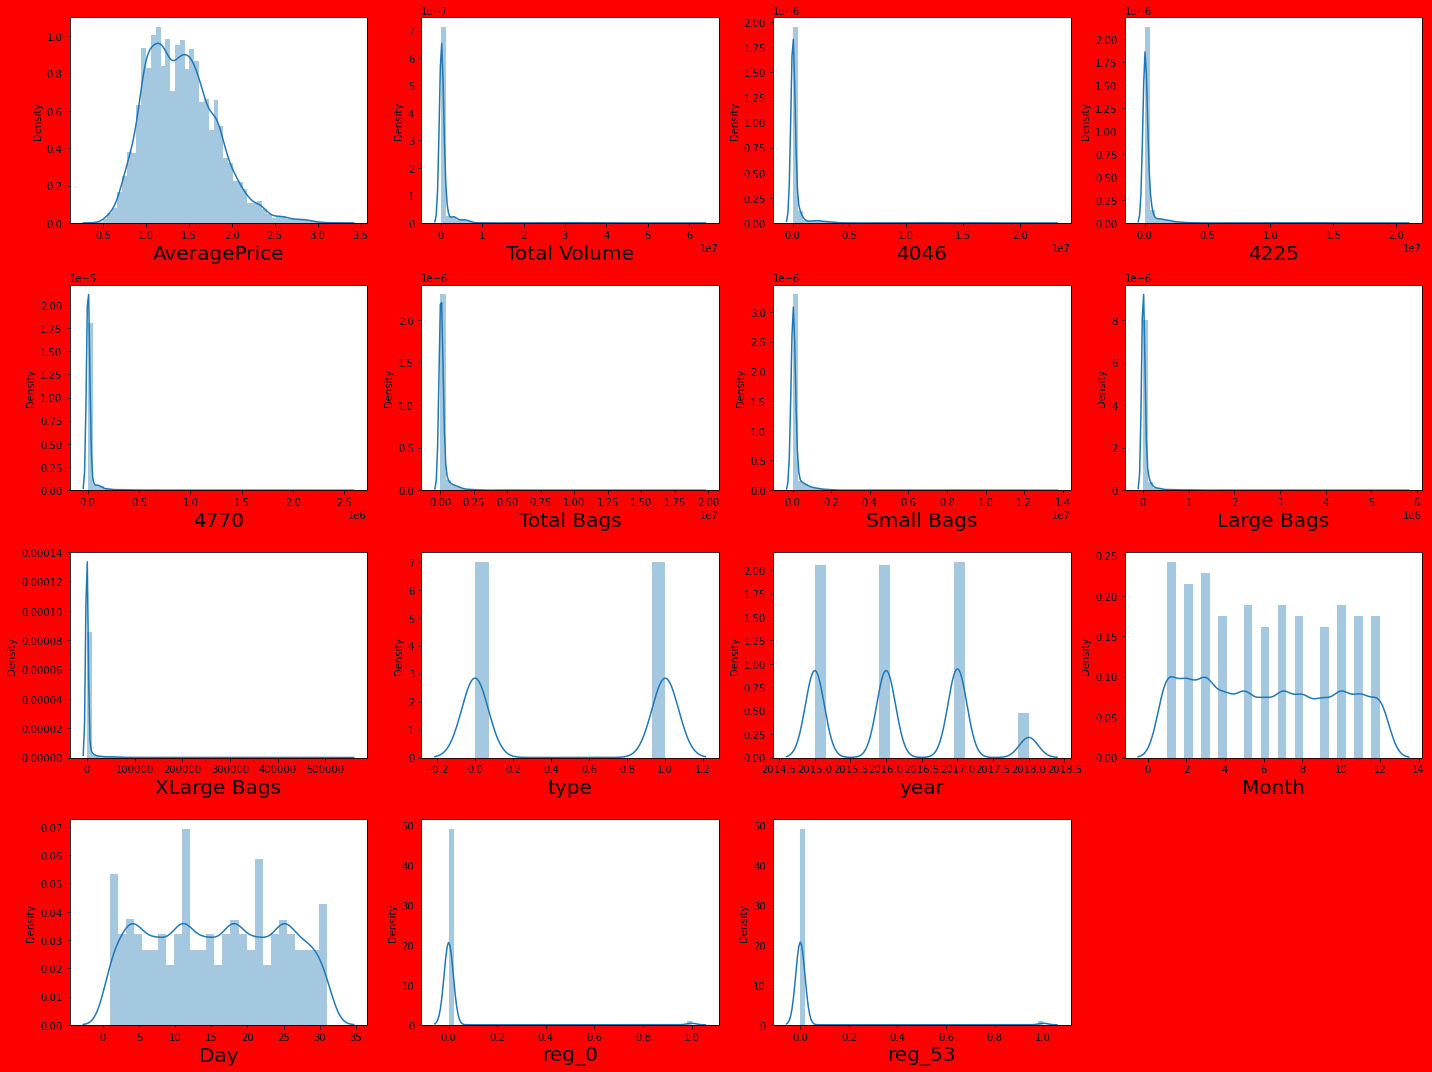

In [29]:
# visualizing data distribution in every column
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in dataset:
    if plotnumber<=15:   # there are 15 column is the given data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Looking at the above distribution plot we can see that almost all the columns are  not maintaining the bell shape curve except for the reg_0, reg_53 column where we can see a visible skewness.

here All column highly skewed in right side..

# Pair plot

<Figure size 1440x720 with 0 Axes>

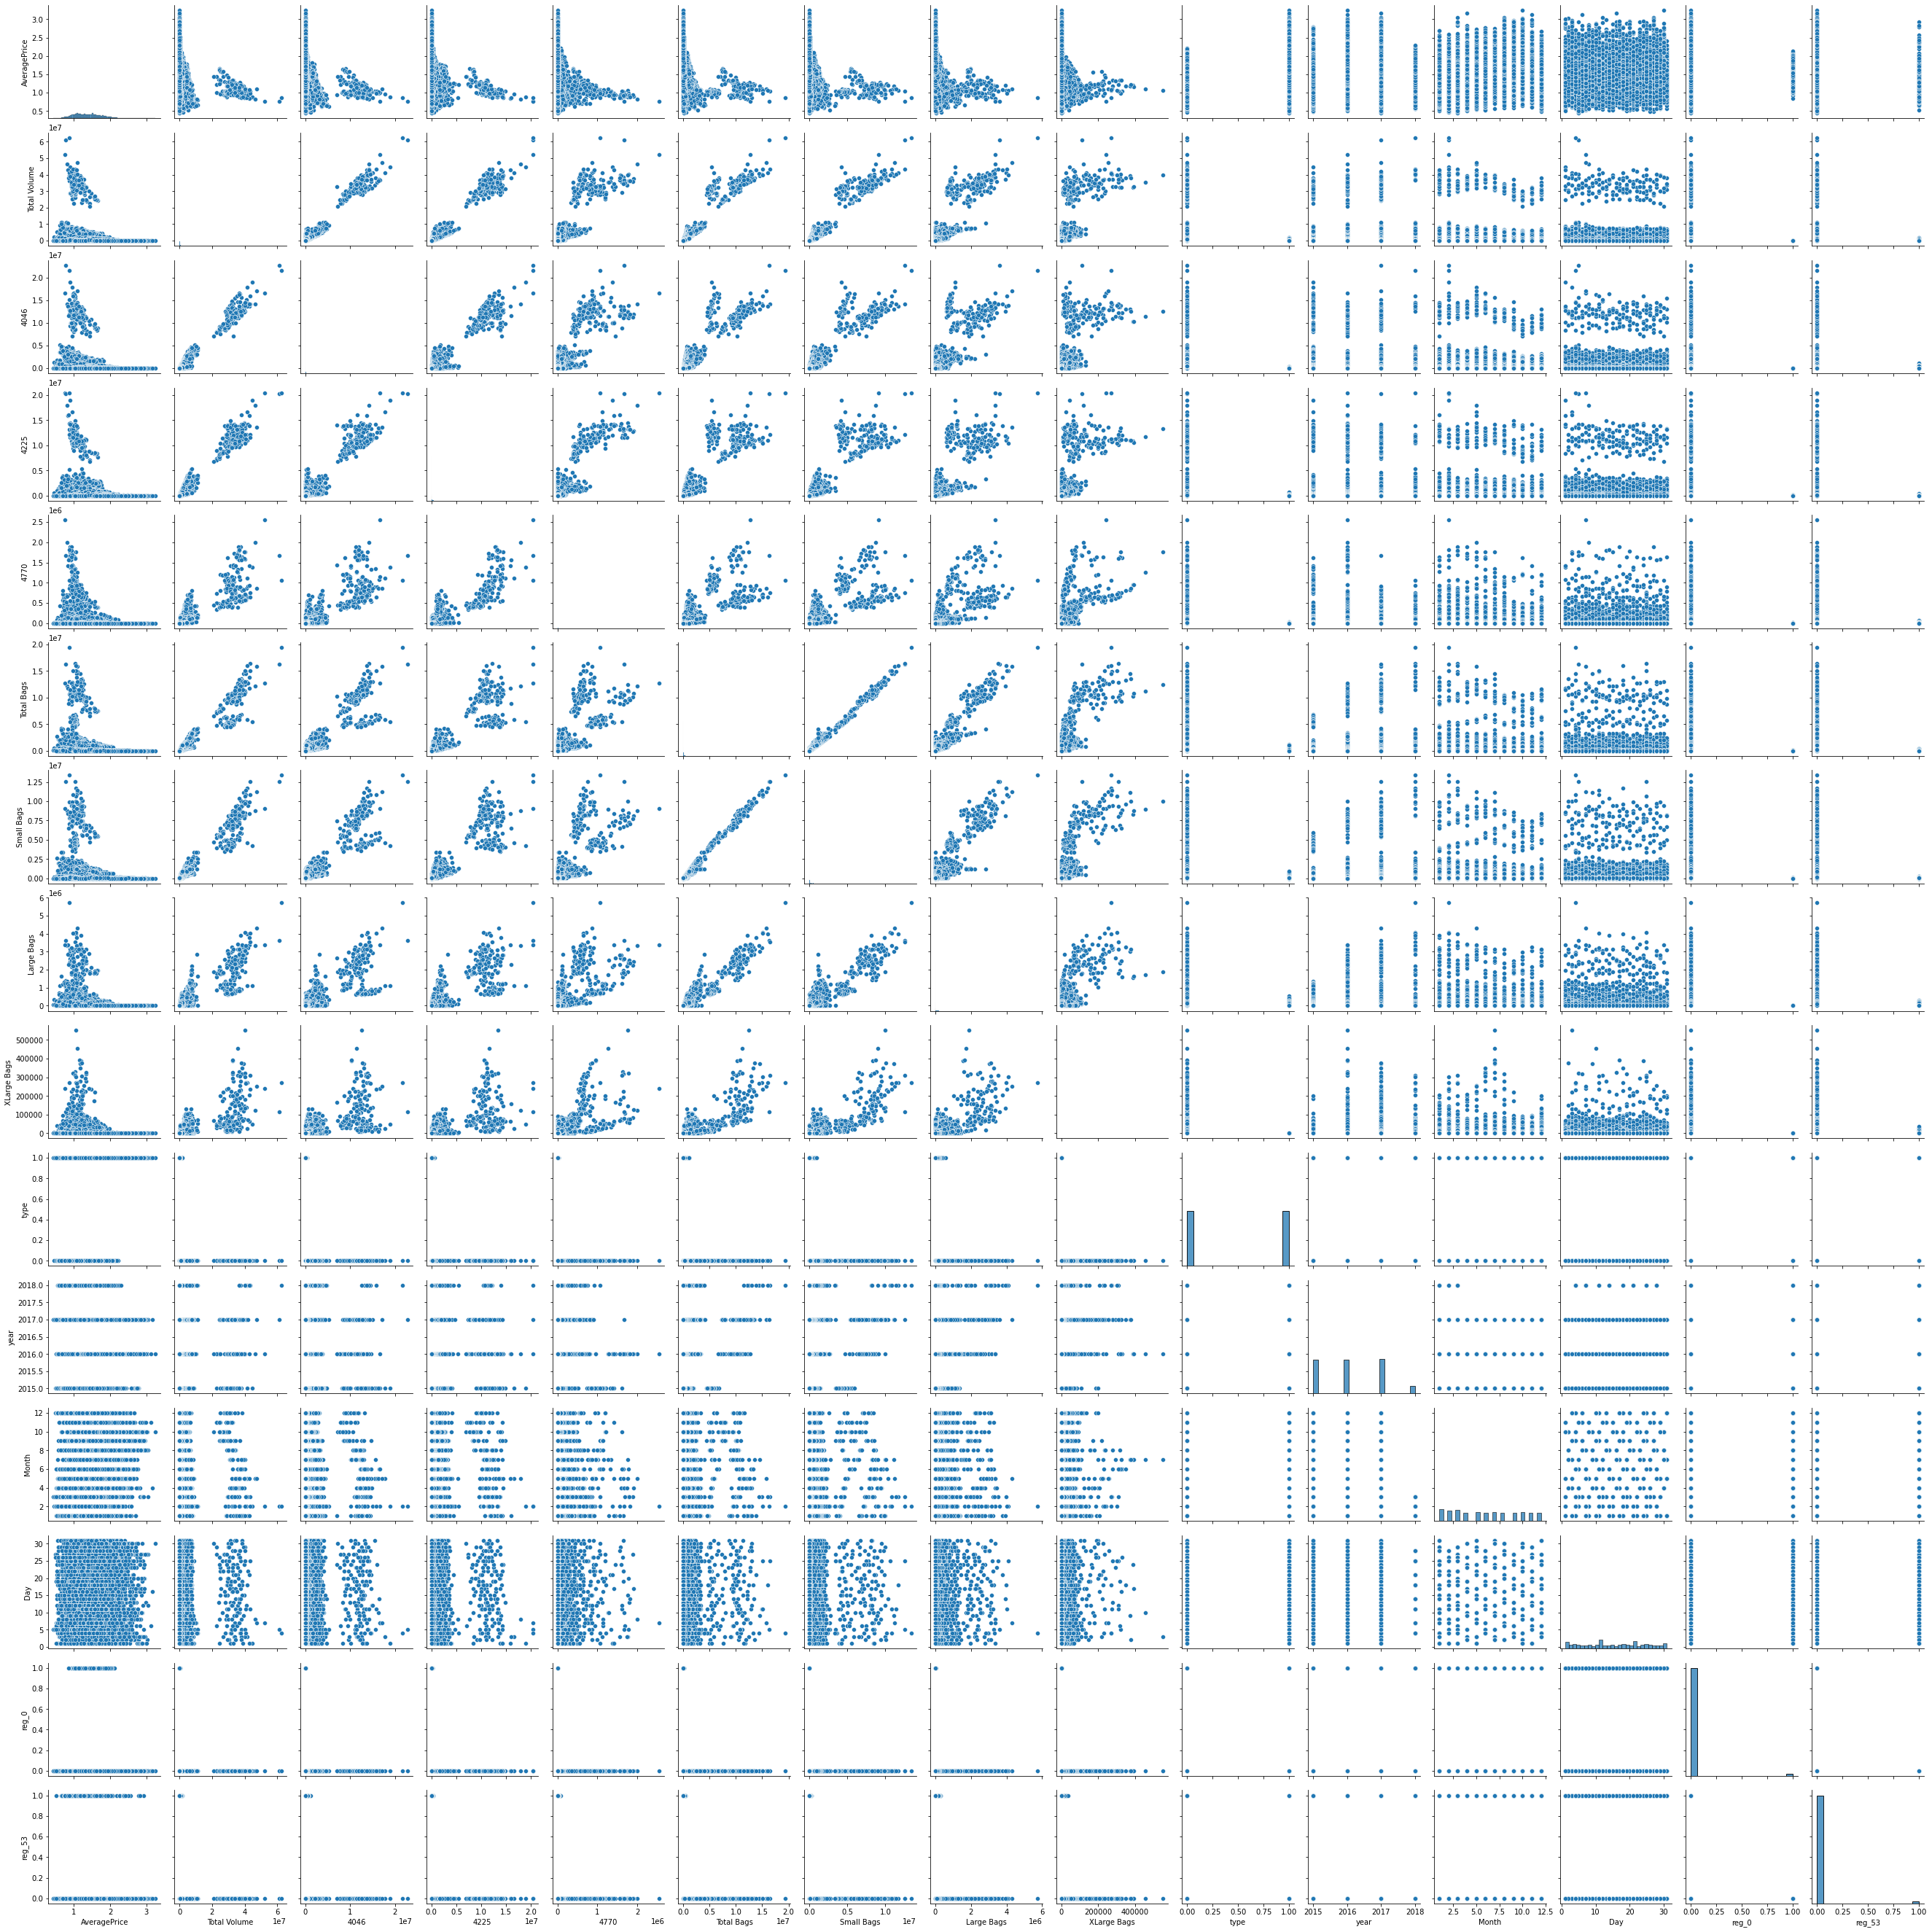

In [31]:
plt.figure(figsize=(20,10))
sns.pairplot(dataset)
plt.show()

With the help of above pairplot we can see that Total bags, small bags, large bags, xlarge bags columns have a linear relationship with Average price. However the other column is too scattered and we can see an increase with respect to Average price but their is no definite linear pattern into it.

# Box Plot

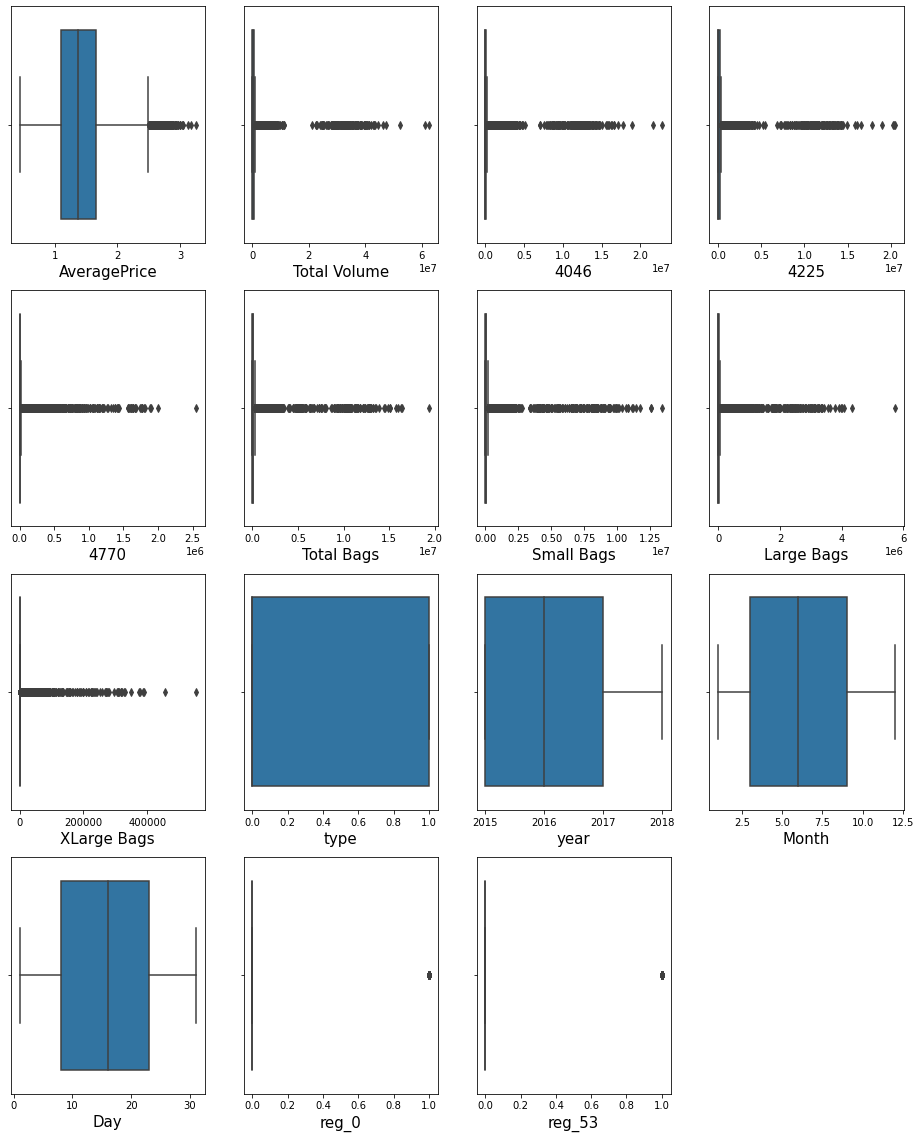

In [32]:
#show the outliers using box plot
plt.figure(figsize=(16,20))
graph = 1

for column in dataset:
    if graph<=15:   # there are 15 column is the given data
        plt.subplot(4,4,graph)
        ax=sns.boxplot(dataset[column])
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()

In [45]:
# Checking relationship between Dependent and Independent variables
x = dataset.drop(columns = ['AveragePrice'])
y = dataset['AveragePrice']

# Z score method to remove outliers

In [46]:
A= dataset.copy()

from scipy.stats import zscore

zscor = zscore(A)
zabs = np.abs(zscor)
DF = A[(zabs <3).all(axis=1)] #taking threshold value as 3
print(DF.shape)

print(A.shape)

(16981, 15)
(18249, 15)


In [47]:
# Checking the dataloss in %

loss = (18249-16981)/18249*100
loss

6.948325935667708

In [48]:
# Compare skewness
x.skew()

Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
Month            0.106617
Day              0.014310
reg_0            7.142715
reg_53           7.176475
dtype: float64

In [49]:
DF.skew()

AveragePrice    0.401004
Total Volume    3.708278
4046            4.875637
4225            4.365651
4770            5.028965
Total Bags      4.002931
Small Bags      4.141606
Large Bags      5.066598
XLarge Bags     6.062341
type           -0.039938
year            0.230496
Month           0.107050
Day             0.011557
reg_0           0.000000
reg_53          0.000000
dtype: float64

In [50]:
# Reducing the skewness further
dataset = DF.copy()
feat = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

skewdf = dataset[feat].copy()

#Trying log transform method

for col in skewdf:
    skewdf[col] = np.log(skewdf[col])
skewdf.skew()

Total Volume   -0.048482
4046                 NaN
4225                 NaN
4770                 NaN
Total Bags           NaN
Small Bags           NaN
Large Bags           NaN
XLarge Bags          NaN
dtype: float64

In [51]:
# Trying power transform method

from sklearn.preprocessing import PowerTransformer

powtrans = PowerTransformer(method = 'yeo-johnson', standardize = True)
df1 = dataset[feat].copy()
df1.skew()

Total Volume    3.708278
4046            4.875637
4225            4.365651
4770            5.028965
Total Bags      4.002931
Small Bags      4.141606
Large Bags      5.066598
XLarge Bags     6.062341
dtype: float64

In [52]:
transformed = powtrans.fit_transform(df1)

transformed = pd.DataFrame(transformed, columns =df1.columns)
transformed.skew()

Total Volume   -0.008267
4046           -0.039798
4225           -0.043195
4770            0.019704
Total Bags     -0.023170
Small Bags     -0.027660
Large Bags     -0.111672
XLarge Bags     0.832814
dtype: float64

In [53]:
skewdf.skew()

Total Volume   -0.048482
4046                 NaN
4225                 NaN
4770                 NaN
Total Bags           NaN
Small Bags           NaN
Large Bags           NaN
XLarge Bags          NaN
dtype: float64

Comparing outputs of Log Transformer and Power Transformer method, it is determined that Power Transformer gives better result.

In [54]:
transformed.index = dataset.index
dataset[feat] = transformed[feat]
x = dataset.drop(columns = ['AveragePrice'])
y = dataset['AveragePrice']
x.skew()

Total Volume   -0.008267
4046           -0.039798
4225           -0.043195
4770            0.019704
Total Bags     -0.023170
Small Bags     -0.027660
Large Bags     -0.111672
XLarge Bags     0.832814
type           -0.039938
year            0.230496
Month           0.107050
Day             0.011557
reg_0           0.000000
reg_53          0.000000
dtype: float64

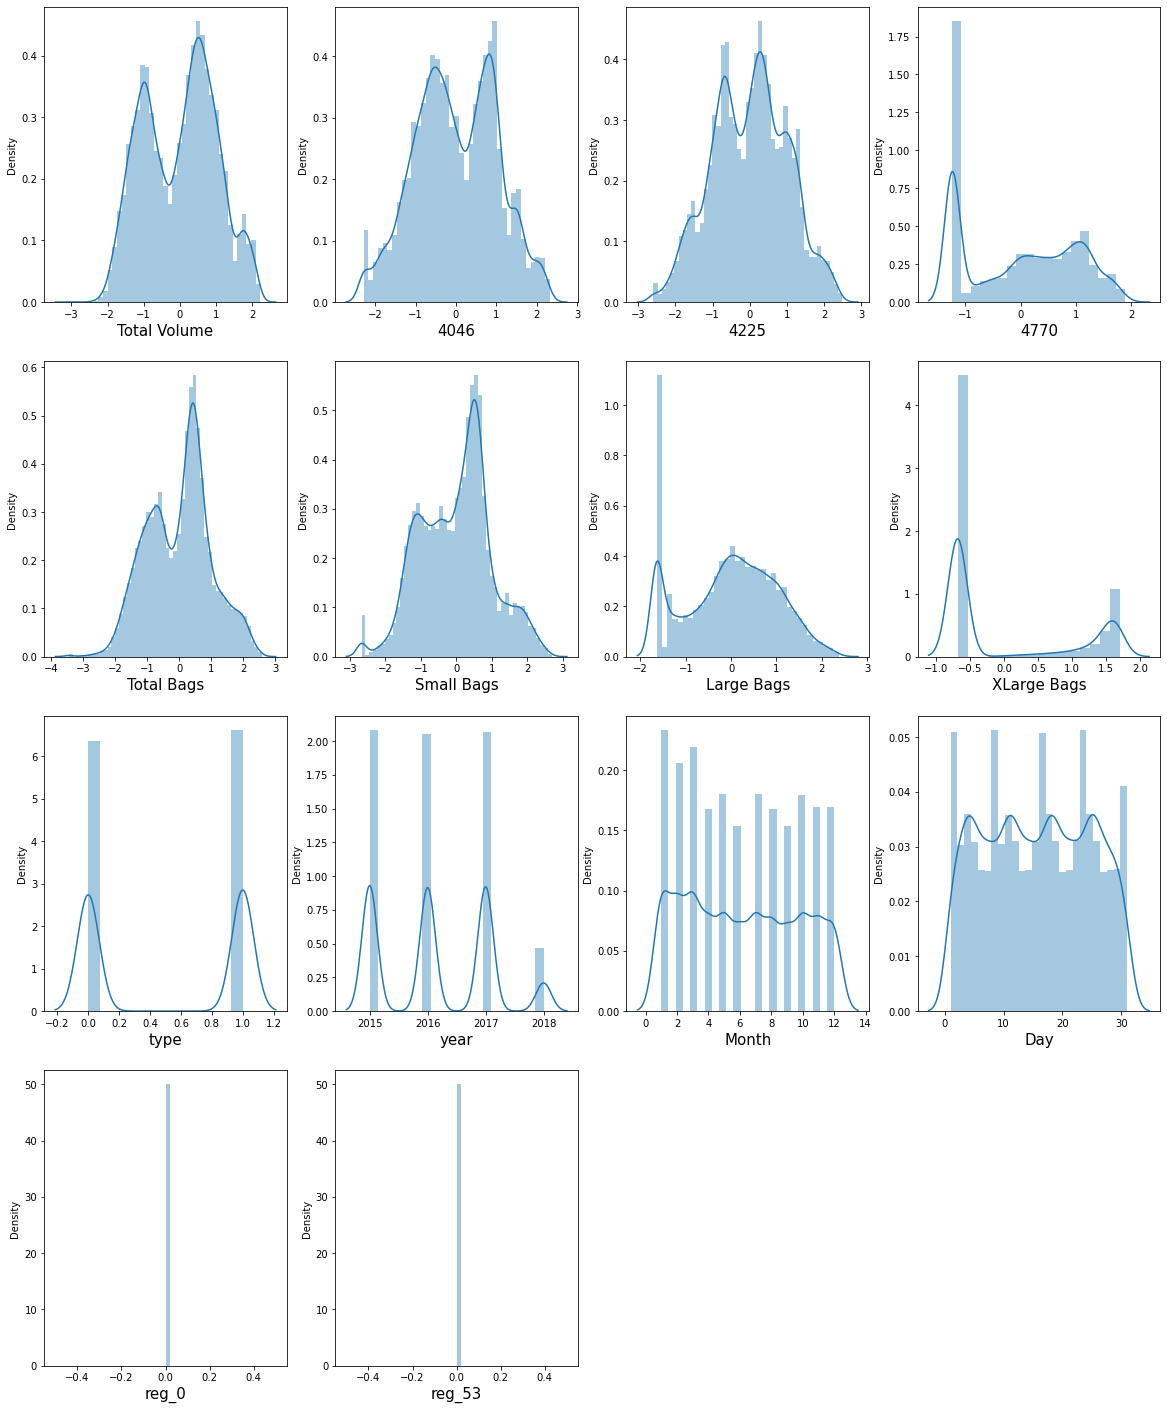

In [55]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in x:
    if plotnum<=14:
        plt.subplot(4,4,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

# Data Standardization

In [58]:
#scale the data using StandardScalar for PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[ 0.74738158,  1.20575476,  0.06380851, ...,  1.28922231,
         0.        ,  0.        ],
       [ 0.67555656,  1.14806152, -0.04367564, ...,  0.49156466,
         0.        ,  0.        ],
       [ 0.78448227,  1.24743205,  0.1132354 , ..., -0.306093  ,
         0.        ,  0.        ],
       ...,
       [ 0.41358443,  0.33852001,  0.14444662, ...,  0.60551575,
         0.        ,  0.        ],
       [ 0.45750038,  0.41547481,  0.28407974, ..., -0.1921419 ,
         0.        ,  0.        ],
       [ 0.62446721,  0.42417723,  0.40154552, ..., -0.98979955,
         0.        ,  0.        ]])

In [59]:
# Checking for Multicollinearity using Variance inflation factor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

,Features,vif
0,Total Volume,53.524199
1,4046,6.837352
2,4225,11.288160
3,4770,3.913588
4,Total Bags,35.659721
5,Small Bags,16.753103
6,Large Bags,3.407533
7,XLarge Bags,2.086681
8,type,3.681517
9,year,1.401489


# Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.


In [60]:
dataset.corr()['AveragePrice'].sort_values()

Total Volume   -0.568506
Total Bags     -0.554964
4046           -0.544724
Small Bags     -0.480475
4770           -0.479510
Large Bags     -0.472898
4225           -0.442392
XLarge Bags    -0.395968
Day             0.026779
year            0.094578
Month           0.149500
type            0.607802
AveragePrice    1.000000
reg_0                NaN
reg_53               NaN
Name: AveragePrice, dtype: float64

reg_53,reg_0,day and year is less correlated with Average price..

let's see what show in heat map?

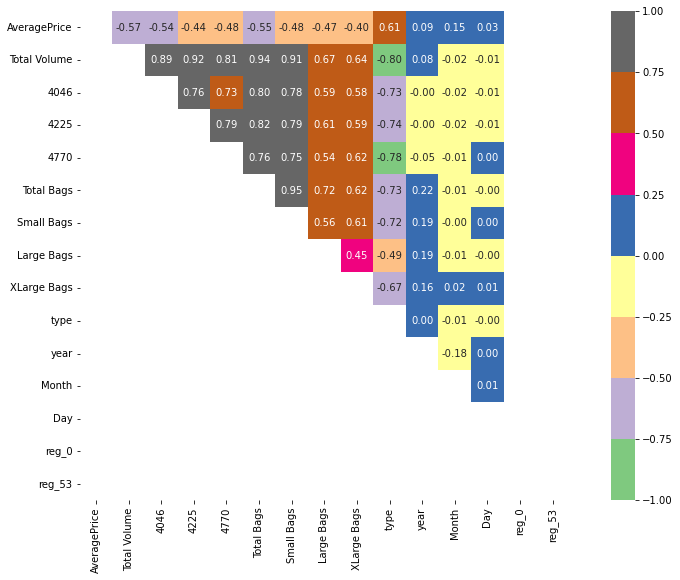

In [61]:
lower_triangle = np.tril(dataset.corr())
plt.figure(figsize=(15,9))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f', 
            annot_kws={'size':10}, cmap="Accent", mask=lower_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# let's see another graph for correlation

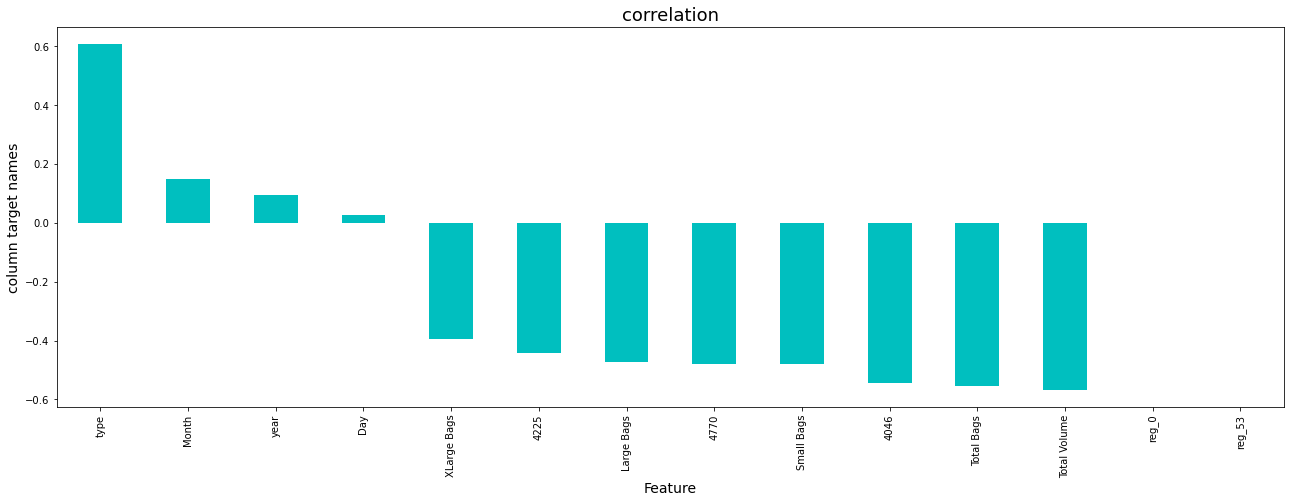

In [63]:
plt.figure(figsize=(22,7))
dataset.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

see this data is very less correlated with Day, reg_53, reg_0 and year and highly correlated wiyh type..so let's drop this column

# this is regression problem so we show the feature scaling

# 1...Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [66]:
X = dataset.drop('AveragePrice', axis=1)
Y = dataset['AveragePrice']

# Feature Scaling

In [67]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,reg_0,reg_53
0,0.747382,1.205755,0.063809,0.214607,0.407588,0.399079,0.716890,-0.685372,-1.020167,-1.209677,1.644245,1.289222,0.0,0.0
1,0.675557,1.148062,-0.043676,-0.047043,0.346367,0.382341,0.572515,-0.685372,-1.020167,-1.209677,1.644245,0.491565,0.0,0.0
2,0.784482,1.247432,0.113235,0.195655,0.369428,0.293896,0.806656,0.841403,-1.020167,-1.209677,1.644245,-0.306093,0.0,0.0
3,0.711378,1.193458,0.008854,0.093191,0.271974,0.270948,0.622223,0.247163,-1.020167,-1.209677,1.644245,-1.103751,0.0,0.0
4,0.678246,1.145774,0.085238,0.222666,0.301682,0.218172,0.774198,1.010738,-1.020167,-1.209677,1.361762,1.517124,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16976,0.602158,0.275851,0.347795,0.016683,1.006855,0.578488,1.531229,1.506873,0.980232,1.981322,-1.180588,-1.331653,0.0,0.0
16977,0.405275,0.282432,0.138361,-0.071029,0.757873,0.629767,1.129755,1.309920,0.980232,1.981322,-1.463071,1.403173,0.0,0.0
16978,0.413584,0.338520,0.144447,0.310041,0.751072,0.618483,1.129449,1.422411,0.980232,1.981322,-1.463071,0.605516,0.0,0.0
16979,0.457500,0.415475,0.284080,0.306699,0.742663,0.698345,0.996067,0.806541,0.980232,1.981322,-1.463071,-0.192142,0.0,0.0


Having a look at our data after complete preprocessing.

# 1.Creating the training and testing data sets

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

Splitting our dataset to training and test numpy arrays with the names having their intended meaning. Where we are using 80% of our dataset for training and 20% of the data for testing.

# Machine Learning Model for Regression and Evaluation Metrics

In [86]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [87]:
#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [88]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.257903102219919
R2 Score is: 53.86400692951231
Cross Validation Score: 20.249196582652512
R2 Score - Cross Validation Score is 33.6148103468598


In [89]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.22389967500469732
R2 Score is: 65.22768003022281
Cross Validation Score: 4.698622208115104
R2 Score - Cross Validation Score is 60.52905782210771


In [90]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.31998183087954113
R2 Score is: 28.980537847306167
Cross Validation Score: -210.29705084927323
R2 Score - Cross Validation Score is 239.27758869657941


In [91]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.29041577664741625
R2 Score is: 41.498479784430764
Cross Validation Score: -8.838781935223805
R2 Score - Cross Validation Score is 50.33726171965457


In [92]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.2920104684291198
R2 Score is: 40.85424460898401
Cross Validation Score: -6.40760043155976
R2 Score - Cross Validation Score is 47.26184504054377


In [93]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.3036847977444304
R2 Score is: 36.03051639928495
Cross Validation Score: -32.08459285051502
R2 Score - Cross Validation Score is 68.11510924979997


In [94]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.2557660174410357
R2 Score is: 54.625440376678824
Cross Validation Score: -8.787501207038035
R2 Score - Cross Validation Score is 63.41294158371686


In [95]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.14098660032743165
R2 Score is: 86.21259866559028
Cross Validation Score: 30.759661762480377
R2 Score - Cross Validation Score is 55.4529369031099


# Extra Trees Regressor give good model for "Average Price"  prdiction